# Main Code


In [344]:
import random
import sys
import timeit
import statistics
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter


class Environment():
    
    def __init__(self):
        self.pattern = 0
        self.Nbits = [2,4,8,12,16]
        self.runtime = []
        self.turns = []
        self.runs = 30
        self.population = 100
        self.percent = 30      # % of the population thats best 
        self.mutationrate = 1  # chance to mutate
        
    def generatePattern(self,size): #1a
        bitList = []
        for i in range(0, size):
            x = str(random.randint(0, 1))
            bitList.append(x)
        bitString = ''.join(bitList)
        return bitString        
    
    def hamming(self, pattern2):
        return sum(bit1 != bit2 for bit1, bit2 in zip(self.pattern, pattern2))
    
    def reverse_hamming(self, pattern2):
        return sum(bit1 == bit2 for bit1, bit2 in zip(self.pattern, pattern2))
    
    def tolist(self,pattern):
        return [char for char in pattern]
    
    def tostring(self,pattern):
        return ''.join(pattern)
    
    
    def evaluate(self, population):
        points = []
        a = 0
        for a in range(0, len(population)):
            points.append(self.reverse_hamming(population[a]))
            a += 1
        return points
    
    #returns the best 30% fitness
    def select(self, tuples):
        return tuples[:e.percent]
        
    def merge_sort(self,population, points):
         # merge the fitness and patterns lists
        temp = list(zip(population, points))      
        # sort the list by the higher fitness to lower
        tuples = sorted(temp, key=itemgetter(1), reverse=True)
        return tuples
    
    def mutate(self, pattern):
        index = random.randint(0,len(pattern)-1)
        if(pattern[index] == '0'):
            pattern[index] = '1'
        elif(pattern[index] == '1'):
            pattern[index] = '0'  
        return pattern
    
    
    # crossover two parents to create two children
    def crossover(self, parent1, parent2):
        # children are copies of parents by default
        p1, p2 = parent1[0], parent2[0]
        # select crossover point that is not on the end of the string
        if(len(p1) > 2):
            point = random.randint(1, len(p1)-2)
        else:
            point = random.randint(1, len(p1)-1)
        # perform crossover
        children1 = p1[:point] + p2[point:]
        children2 = p2[:point] + p1[point:]
        return [children1, children2]
    
    
    

# Ex1


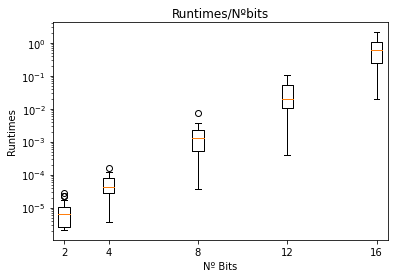

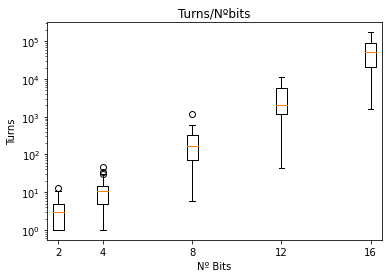

In [293]:
random.seed(1)
e = Environment()
runtimes = []
turns = []
durantion = 60*60 #60 seconds * 60 minutes stopping at 1hour
deadline = timeit.default_timer() 
while timeit.default_timer()  < deadline + durantion:
    for x in e.Nbits:
            runtime = []
            attempts = []
            for y in range(0, e.runs):
                e.pattern = e.generatePattern(x)    #correct patterk,
                test = 0
                turn = 0
                start = timeit.default_timer()         
                while(test != e.pattern):    
                    test = e.generatePattern(x)        #generates pattern and checks if right
                    turn += 1
                stop = timeit.default_timer()
                runtime.append(stop-start)    
                attempts.append(turn)   
            runtimes.append(runtime)
            turns.append(attempts)
            
            
    plt.ylabel('Runtimes')
    plt.xlabel('Nº Bits')
    plt.title('Runtimes/Nºbits')
    plt.boxplot(runtimes, positions = e.Nbits)      
    plt.yscale("log")
    plt.show()

               
    plt.ylabel('Turns')
    plt.xlabel('Nº Bits')
    plt.title('Turns/Nºbits')
    plt.boxplot(turns, positions = e.Nbits)     
    plt.yscale("log")
    plt.show()
    break

# Ex2

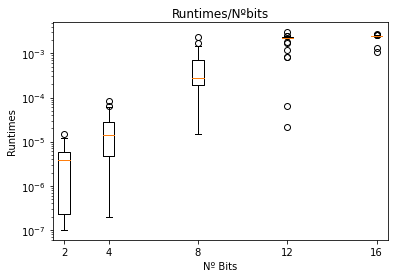

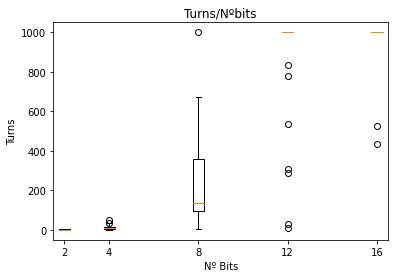

In [330]:
random.seed(1)
e = Environment()
runtimes = []
mutations = []

for x in e.Nbits:    
    runtime = []
    attempts = []  
    for y in range(0, e.runs):
        e.pattern = e.generatePattern(x)  #objetive pattern
        patlist = [char for char in e.pattern]
        
        pattern = e.generatePattern(x)    #starting pattern
        patlist2 = [char for char in pattern]
        fit = 0
        turns = 0
        goodmut = 0 
        
        start = timeit.default_timer() 
        while(patlist2 != patlist and turns < 1000):
            temp = e.mutate(patlist2)
            tempfit = e.reverse_hamming(temp) 
            if(tempfit > fit):
                patlist2 = temp
                fit = tempfit
                goodmut += 1
            turns += 1
        stop = timeit.default_timer()
        
        runtime.append(stop-start)
        attempts.append(turns)   
    runtimes.append(runtime)
    mutations.append(attempts)
    
plt.ylabel('Runtimes')
plt.xlabel('Nº Bits')
plt.title('Runtimes/Nºbits')
plt.boxplot(runtimes, positions = e.Nbits)      
plt.yscale("log")
plt.show()

               
plt.ylabel('Turns')
plt.xlabel('Nº Bits')
plt.title('Turns/Nºbits')
plt.boxplot(mutations, positions = e.Nbits)     
#plt.yscale("log")
plt.show()

# Ex3

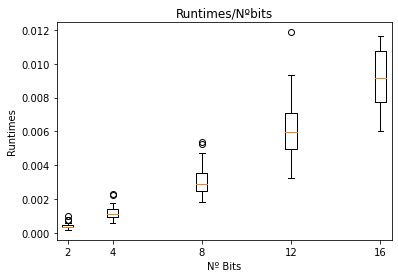

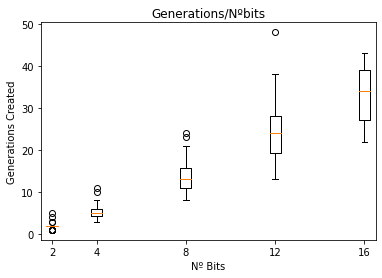

In [345]:
random.seed(1)
e = Environment()
runtimes = []
gens = []

for nbits in e.Nbits:    
    runtime = []
    attempts = []  
    for y in range(0, e.runs):    
        
        turns = 0
        somatorio = 0
        
        #Generate the objetive pattern
        e.pattern = e.generatePattern(nbits)  
        
        # create the inicial population
        initial_population = []
        a = 0
        for a in range (0 , e.population):
            initial_population.append(e.generatePattern(nbits))
            a += 1
            
        #Best evaluation stagnates when max fitness is reached
        max_fitness = e.percent*nbits + (e.population - e.percent)*(nbits-1)
        
        # evaluate the initial population
        initial_fitness = [e.reverse_hamming(p) for p in initial_population]
        
        # merges population and its fitness
        population = e.merge_sort(initial_population,initial_fitness)
        
        
        start = timeit.default_timer() 
        while(somatorio  <  max_fitness):
    
            # selects the best % patterns (higher fitness)
            best_percent = e.select(population) 
            
            #gets the best patterns for mutation
            best_pattern = [x[0] for x in best_percent]
            best_pattern_list = []
            for pattern in best_percent:
                best_pattern_list.append(e.tolist(pattern))
            
            # generate the remaining population by mutating random best patterns
            new_population = []
            for b in range (0, e.population - e.percent):
                choice = random.choice(best_pattern_list)[0]
                patlist = e.mutate([char for char in choice])   # envia e recebe em list
                newpat = e.tostring(patlist)                    # passa de list para string
                new_population.append(newpat)
                b += 1
             
            fit = [e.reverse_hamming(p) for p in new_population]
            population = e.merge_sort(new_population,fit)
            
            
            #puts lits together and sort the best old population and the mutated one
            population.extend(best_percent)
            
            population = sorted(population, key=itemgetter(1), reverse=True)
              
            somatorio = sum([z[1] for z in population])
            turns += 1   
            
        stop = timeit.default_timer()
        runtime.append(stop-start)
        attempts.append(turns)   
    runtimes.append(runtime)
    gens.append(attempts)
    
plt.ylabel('Runtimes')
plt.xlabel('Nº Bits')
plt.title('Runtimes/Nºbits')
plt.boxplot(runtimes, positions = e.Nbits)      
plt.show()

               
plt.ylabel('Generations Created')
plt.xlabel('Nº Bits')
plt.title('Generations/Nºbits')
plt.boxplot(gens, positions = e.Nbits)     
plt.show()

# Ex4

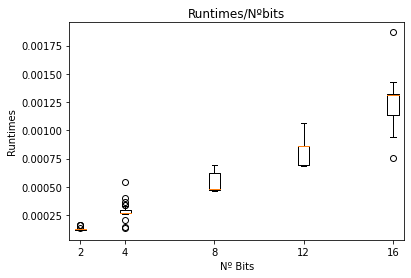

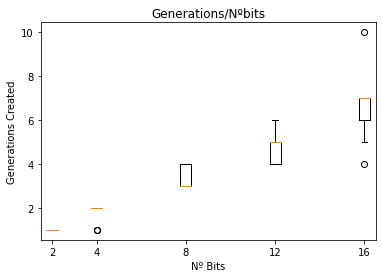

In [343]:
random.seed(1)
e = Environment()
runtimes = []
genarations = []

for nbits in e.Nbits:    
    runtime = []
    attempts = []  
    for y in range(0, e.runs):    
        
        turns = 0
        somatorio = 0
        
        #Generate the objetive pattern
        e.pattern = e.generatePattern(nbits)  
        
        # create the inicial population
        initial_population = []
        a = 0
        for a in range (0, e.population):
            initial_population.append(e.generatePattern(nbits))
        a += 1
    
        #Best evaluation stagnates when max fitness is reached
        max_fitness = e.percent*nbits + (e.population - e.percent)*(nbits-1)
        
        # evaluate the initial population
        initial_fitness = [e.reverse_hamming(p) for p in initial_population]
        
        # merges population and its fitness
        population = e.merge_sort(initial_population,initial_fitness)
        start = timeit.default_timer()
        while(somatorio  <  max_fitness):
    
            # selects the best % patterns (higher fitness)
            best_percent = e.select(population) 
            
            # generate the remaining population by mutating random best patterns
            new_population = []
            for b in range (0, (e.population - e.percent), 2):
                parent1 = random.choice(best_percent)
                parent2 = random.choice(best_percent)
                children1, children2 = e.crossover(parent1, parent2)
                new_population.append(children1)
                new_population.append(children2)
                b += 1
             
            fit = [e.reverse_hamming(p) for p in new_population]
            population = e.merge_sort(new_population,fit)
            
            
            #puts list together and sort the best old population and the mutated one
            population.extend(best_percent)
            
            population = sorted(population, key=itemgetter(1), reverse=True)
              
            somatorio = sum([z[1] for z in population])
            turns += 1   

   
        stop = timeit.default_timer()
        runtime.append(stop-start)
        attempts.append(turns)   
    runtimes.append(runtime)
    genarations.append(attempts)
    
plt.ylabel('Runtimes')
plt.xlabel('Nº Bits')
plt.title('Runtimes/Nºbits')
plt.boxplot(runtimes, positions = e.Nbits)      
plt.show()

               
plt.ylabel('Generations Created')
plt.xlabel('Nº Bits')
plt.title('Generations/Nºbits')
plt.boxplot(genarations, positions = e.Nbits)     
plt.show()